## 1. Pendahuluan TensorFlow

**TensorFlow** adalah library open-source untuk numerical computation dan machine learning.

### Fitur Utama:
- **Tensors**: Multi-dimensional arrays (seperti NumPy arrays)
- **Automatic Differentiation**: Menghitung gradients secara otomatis
- **GPU/TPU Support**: Akselerasi hardware
- **tf.function**: Kompilasi ke graph untuk performa optimal
- **Keras Integration**: High-level API

### Kapan Perlu Custom Code?
- Custom loss functions
- Custom metrics
- Custom layers dengan behavior khusus
- Custom training loops
- Research dan eksperimen

In [1]:
# Import libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Set random seed
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU available: {tf.config.list_physical_devices('GPU')}")

C:\Users\HP Pavilion 15\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


TensorFlow version: 2.20.0
GPU available: []


## 2. Tensors dan Operations

**Tensor** adalah struktur data fundamental di TensorFlow - multidimensional array yang mirip dengan NumPy ndarray.

### 2.1 Membuat Tensors

In [2]:
# Membuat tensors

# Dari Python list
t1 = tf.constant([[1, 2, 3], [4, 5, 6]])
print("Tensor dari list:")
print(t1)
print(f"Shape: {t1.shape}")
print(f"Dtype: {t1.dtype}")

Tensor dari list:
tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
Shape: (2, 3)
Dtype: <dtype: 'int32'>


In [3]:
# Berbagai cara membuat tensor

# Zeros dan Ones
zeros = tf.zeros([3, 4])
ones = tf.ones([2, 3])

# Random tensors
random_normal = tf.random.normal([3, 3], mean=0, stddev=1)
random_uniform = tf.random.uniform([2, 2], minval=0, maxval=10)

# Range
t_range = tf.range(10)

# Dari NumPy
np_array = np.array([[1., 2.], [3., 4.]])
t_from_np = tf.constant(np_array)

print(f"Zeros:\n{zeros}\n")
print(f"Random Normal:\n{random_normal}\n")
print(f"Range: {t_range}")

Zeros:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Random Normal:
[[ 0.3274685 -0.8426258  0.3194337]
 [-1.4075519 -2.3880599 -1.0392479]
 [-0.5573232  0.539707   1.6994323]]

Range: [0 1 2 3 4 5 6 7 8 9]


In [4]:
# Tensor properties
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])

print(f"Shape: {t.shape}")
print(f"Dtype: {t.dtype}")
print(f"Device: {t.device}")
print(f"NumPy: \n{t.numpy()}")

Shape: (2, 3)
Dtype: <dtype: 'float32'>
Device: /job:localhost/replica:0/task:0/device:CPU:0
NumPy: 
[[1. 2. 3.]
 [4. 5. 6.]]


### 2.2 Tensor Operations

In [5]:
# Basic operations
a = tf.constant([[1., 2.], [3., 4.]])
b = tf.constant([[5., 6.], [7., 8.]])

# Arithmetic
print("Addition:")
print(a + b)  # atau tf.add(a, b)

print("\nMultiplication (element-wise):")
print(a * b)  # atau tf.multiply(a, b)

print("\nMatrix multiplication:")
print(a @ b)  # atau tf.matmul(a, b)

Addition:
tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)

Multiplication (element-wise):
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)

Matrix multiplication:
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)


In [6]:
# More operations
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])

print(f"Square: \n{tf.square(t)}\n")
print(f"Square root: \n{tf.sqrt(t)}\n")
print(f"Exp: \n{tf.exp(t)}\n")
print(f"Transpose: \n{tf.transpose(t)}")

Square: 
[[ 1.  4.  9.]
 [16. 25. 36.]]

Square root: 
[[1.        1.4142135 1.7320508]
 [2.        2.236068  2.4494898]]

Exp: 
[[  2.7182817   7.389056   20.085537 ]
 [ 54.59815   148.41316   403.4288   ]]

Transpose: 
[[1. 4.]
 [2. 5.]
 [3. 6.]]


In [7]:
# Reduction operations
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])

print(f"Sum (all): {tf.reduce_sum(t)}")
print(f"Sum (axis=0): {tf.reduce_sum(t, axis=0)}")
print(f"Sum (axis=1): {tf.reduce_sum(t, axis=1)}")
print(f"Mean: {tf.reduce_mean(t)}")
print(f"Max: {tf.reduce_max(t)}")
print(f"Argmax (axis=1): {tf.argmax(t, axis=1)}")

Sum (all): 21.0
Sum (axis=0): [5. 7. 9.]
Sum (axis=1): [ 6. 15.]
Mean: 3.5
Max: 6.0
Argmax (axis=1): [2 2]


### 2.3 Indexing dan Slicing

In [8]:
# Indexing
t = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(f"Original:\n{t}\n")
print(f"t[0]: {t[0]}")
print(f"t[1, 2]: {t[1, 2]}")
print(f"t[:, 1]: {t[:, 1]}")
print(f"t[1:, :2]:\n{t[1:, :2]}")

Original:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

t[0]: [1 2 3]
t[1, 2]: 6
t[:, 1]: [2 5 8]
t[1:, :2]:
[[4 5]
 [7 8]]


### 2.4 Variables

`tf.Variable` adalah tensor yang nilainya bisa diubah (mutable), digunakan untuk trainable parameters.

In [9]:
# tf.Variable
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
print(f"Variable:\n{v}\n")

# Mengubah nilai
v.assign([[10., 20., 30.], [40., 50., 60.]])
print(f"After assign:\n{v}\n")

# Mengubah sebagian
v[0, 1].assign(999)
print(f"After partial assign:\n{v}\n")

# In-place operations
v.assign_add([[1, 1, 1], [1, 1, 1]])
print(f"After assign_add:\n{v}")

Variable:
<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

After assign:
<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[10., 20., 30.],
       [40., 50., 60.]], dtype=float32)>

After partial assign:
<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 10., 999.,  30.],
       [ 40.,  50.,  60.]], dtype=float32)>

After assign_add:
<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[  11., 1000.,   31.],
       [  41.,   51.,   61.]], dtype=float32)>


## 3. Custom Loss Functions

Custom loss function diperlukan ketika built-in losses tidak memenuhi kebutuhan.

### 3.1 Loss Function sebagai Python Function

In [10]:
# Custom Huber Loss (sebagai function)
def huber_loss(y_true, y_pred, delta=1.0):
    """
    Huber Loss: kombinasi MSE dan MAE
    - Kuadratik untuk error kecil (< delta)
    - Linear untuk error besar (>= delta)
    """
    error = y_true - y_pred
    is_small_error = tf.abs(error) < delta
    
    squared_loss = tf.square(error) / 2
    linear_loss = delta * (tf.abs(error) - delta / 2)
    
    return tf.where(is_small_error, squared_loss, linear_loss)

# Test
y_true = tf.constant([1.0, 2.0, 3.0, 10.0])
y_pred = tf.constant([1.5, 2.0, 2.5, 5.0])

loss = huber_loss(y_true, y_pred)
print(f"Huber Loss per sample: {loss.numpy()}")
print(f"Mean Huber Loss: {tf.reduce_mean(loss).numpy():.4f}")

Huber Loss per sample: [0.125 0.    0.125 4.5  ]
Mean Huber Loss: 1.1875


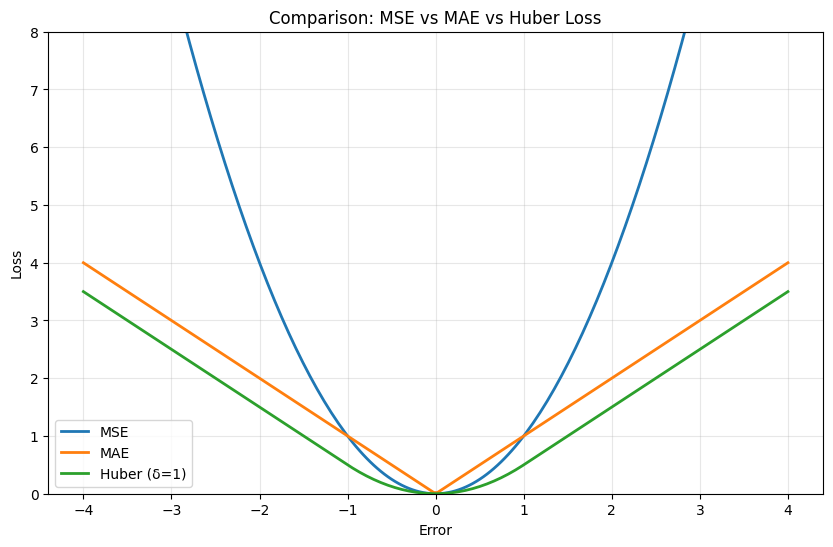

In [11]:
# Visualisasi Huber Loss vs MSE vs MAE
import matplotlib.pyplot as plt

errors = np.linspace(-4, 4, 200)

mse = errors ** 2
mae = np.abs(errors)
huber = np.where(np.abs(errors) < 1, errors**2 / 2, np.abs(errors) - 0.5)

plt.figure(figsize=(10, 6))
plt.plot(errors, mse, label='MSE', linewidth=2)
plt.plot(errors, mae, label='MAE', linewidth=2)
plt.plot(errors, huber, label='Huber (δ=1)', linewidth=2)
plt.xlabel('Error')
plt.ylabel('Loss')
plt.title('Comparison: MSE vs MAE vs Huber Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 8)
plt.show()

### 3.2 Loss Function sebagai Class

In [12]:
# Custom Huber Loss sebagai Class (dengan configurable delta)
class HuberLoss(keras.losses.Loss):
    def __init__(self, delta=1.0, **kwargs):
        super().__init__(**kwargs)
        self.delta = delta
    
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.delta
        squared_loss = tf.square(error) / 2
        linear_loss = self.delta * (tf.abs(error) - self.delta / 2)
        return tf.where(is_small_error, squared_loss, linear_loss)
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, 'delta': self.delta}

# Penggunaan
huber = HuberLoss(delta=2.0)
loss = huber(y_true, y_pred)
print(f"Custom HuberLoss (delta=2.0): {tf.reduce_mean(loss).numpy():.4f}")

Custom HuberLoss (delta=2.0): 2.0625


In [13]:
# Menggunakan custom loss dalam model
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Model dengan custom loss
model = keras.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss=HuberLoss(delta=2.0), optimizer='adam')
model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid), verbose=1)

Epoch 1/5


C:\Users\HP Pavilion 15\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9729 - val_loss: 0.8368
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6947 - val_loss: 0.7399
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6710 - val_loss: 0.6688
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6572 - val_loss: 0.6497
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6506 - val_loss: 0.6622


## 4. Custom Metrics

Custom metrics untuk evaluasi model selama dan setelah training.

### 4.1 Streaming Metric (Stateful)

In [14]:
# Custom Huber Metric
class HuberMetric(keras.metrics.Metric):
    def __init__(self, delta=1.0, **kwargs):
        super().__init__(**kwargs)
        self.delta = delta
        # State variables (akan di-track selama training)
        self.total = self.add_weight(name='total', initializer='zeros')
        self.count = self.add_weight(name='count', initializer='zeros')
    
    def update_state(self, y_true, y_pred, sample_weight=None):
        # Hitung Huber loss
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.delta
        squared_loss = tf.square(error) / 2
        linear_loss = self.delta * (tf.abs(error) - self.delta / 2)
        huber = tf.where(is_small_error, squared_loss, linear_loss)
        
        # Update state
        self.total.assign_add(tf.reduce_sum(huber))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    
    def result(self):
        return self.total / self.count
    
    def reset_state(self):
        self.total.assign(0.)
        self.count.assign(0.)
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, 'delta': self.delta}

# Test metric
metric = HuberMetric(delta=1.0)
metric.update_state(y_true, y_pred)
print(f"Huber Metric result: {metric.result().numpy():.4f}")

Huber Metric result: 1.1875


In [15]:
# Custom Precision at specific threshold
class PrecisionAtThreshold(keras.metrics.Metric):
    def __init__(self, threshold=0.5, **kwargs):
        super().__init__(**kwargs)
        self.threshold = threshold
        self.true_positives = self.add_weight(name='tp', initializer='zeros')
        self.predicted_positives = self.add_weight(name='pp', initializer='zeros')
    
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred_binary = tf.cast(y_pred >= self.threshold, tf.float32)
        y_true = tf.cast(y_true, tf.float32)
        
        self.true_positives.assign_add(tf.reduce_sum(y_pred_binary * y_true))
        self.predicted_positives.assign_add(tf.reduce_sum(y_pred_binary))
    
    def result(self):
        return self.true_positives / (self.predicted_positives + keras.backend.epsilon())
    
    def reset_state(self):
        self.true_positives.assign(0.)
        self.predicted_positives.assign(0.)

print("Custom PrecisionAtThreshold metric created!")

Custom PrecisionAtThreshold metric created!


## 5. Custom Layers

Membuat layer custom untuk behavior yang tidak ada di Keras.

### 5.1 Lambda Layer (Simple)

In [16]:
# Lambda layer untuk operasi sederhana
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

# Test
test_input = tf.constant([[1., 2.], [3., 4.]])
output = exponential_layer(test_input)
print(f"Input:\n{test_input.numpy()}")
print(f"\nExp output:\n{output.numpy()}")

Input:
[[1. 2.]
 [3. 4.]]

Exp output:
[[ 2.7182817  7.389056 ]
 [20.085537  54.59815  ]]


### 5.2 Custom Layer tanpa Weights

In [17]:
# Custom layer tanpa trainable weights
class MyFlatten(keras.layers.Layer):
    """Custom Flatten layer"""
    def call(self, inputs):
        return tf.reshape(inputs, [tf.shape(inputs)[0], -1])

# Custom Softplus layer
class Softplus(keras.layers.Layer):
    """Softplus activation: log(1 + exp(x))"""
    def call(self, inputs):
        return tf.math.softplus(inputs)

# Test
flatten = MyFlatten()
test_input = tf.constant([[[1., 2.], [3., 4.]], [[5., 6.], [7., 8.]]])  # Shape: (2, 2, 2)
output = flatten(test_input)
print(f"Input shape: {test_input.shape}")
print(f"Flattened shape: {output.shape}")

Input shape: (2, 2, 2)
Flattened shape: (2, 4)


### 5.3 Custom Layer dengan Weights

In [18]:
# Custom Dense layer
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)
    
    def build(self, input_shape):
        # Membuat weights saat pertama kali layer dipanggil
        self.kernel = self.add_weight(
            name='kernel',
            shape=[input_shape[-1], self.units],
            initializer='glorot_uniform',
            trainable=True
        )
        self.bias = self.add_weight(
            name='bias',
            shape=[self.units],
            initializer='zeros',
            trainable=True
        )
        super().build(input_shape)
    
    def call(self, inputs):
        z = tf.matmul(inputs, self.kernel) + self.bias
        if self.activation:
            return self.activation(z)
        return z
    
    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            'units': self.units,
            'activation': keras.activations.serialize(self.activation)
        }

# Test
my_dense = MyDense(10, activation='relu')
test_input = tf.random.normal([32, 20])  # batch_size=32, input_dim=20
output = my_dense(test_input)
print(f"Input shape: {test_input.shape}")
print(f"Output shape: {output.shape}")
print(f"Trainable weights: {[w.name for w in my_dense.trainable_weights]}")

Input shape: (32, 20)
Output shape: (32, 10)
Trainable weights: ['kernel', 'bias']


In [19]:
# Custom Layer: Layer Normalization (simplified)
class MyLayerNorm(keras.layers.Layer):
    def __init__(self, epsilon=1e-6, **kwargs):
        super().__init__(**kwargs)
        self.epsilon = epsilon
    
    def build(self, input_shape):
        # Scale (gamma) dan shift (beta) parameters
        self.gamma = self.add_weight(
            name='gamma',
            shape=input_shape[-1:],
            initializer='ones',
            trainable=True
        )
        self.beta = self.add_weight(
            name='beta',
            shape=input_shape[-1:],
            initializer='zeros',
            trainable=True
        )
        super().build(input_shape)
    
    def call(self, inputs):
        mean = tf.reduce_mean(inputs, axis=-1, keepdims=True)
        variance = tf.reduce_mean(tf.square(inputs - mean), axis=-1, keepdims=True)
        normalized = (inputs - mean) / tf.sqrt(variance + self.epsilon)
        return self.gamma * normalized + self.beta

# Test
layer_norm = MyLayerNorm()
test_input = tf.random.normal([2, 4])
output = layer_norm(test_input)
print(f"Layer Norm output mean (should be ~0): {tf.reduce_mean(output, axis=-1).numpy()}")
print(f"Layer Norm output std (should be ~1): {tf.math.reduce_std(output, axis=-1).numpy()}")

Layer Norm output mean (should be ~0): [5.9604645e-08 1.4901161e-08]
Layer Norm output std (should be ~1): [0.99999875 0.99999917]


### 5.4 Layer dengan Multiple Inputs/Outputs

In [20]:
# Layer dengan multiple inputs
class AdditionLayer(keras.layers.Layer):
    """Menambahkan dua inputs"""
    def call(self, inputs):
        a, b = inputs  # Unpack list of inputs
        return a + b

# Layer dengan multiple outputs
class SplitLayer(keras.layers.Layer):
    """Memisahkan tensor menjadi dua bagian"""
    def call(self, inputs):
        return tf.split(inputs, 2, axis=-1)

# Test
add_layer = AdditionLayer()
a = tf.constant([[1., 2.]])
b = tf.constant([[3., 4.]])
print(f"Addition: {add_layer([a, b]).numpy()}")

split_layer = SplitLayer()
x = tf.constant([[1., 2., 3., 4.]])
out1, out2 = split_layer(x)
print(f"Split output 1: {out1.numpy()}")
print(f"Split output 2: {out2.numpy()}")

Addition: [[4. 6.]]
Split output 1: [[1. 2.]]
Split output 2: [[3. 4.]]


## 6. Custom Models

Membuat model custom dengan subclassing `keras.Model`.

In [21]:
# Custom Model dengan Subclassing
class ResidualBlock(keras.layers.Layer):
    """Residual block: output = activation(input + conv(input))"""
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [
            keras.layers.Dense(n_neurons, activation='relu')
            for _ in range(n_layers)
        ]
    
    def call(self, inputs):
        z = inputs
        for layer in self.hidden:
            z = layer(z)
        return inputs + z  # Skip connection


class ResidualRegressor(keras.Model):
    """Custom model dengan residual blocks"""
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation='relu')
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)
    
    def call(self, inputs):
        z = self.hidden1(inputs)
        for _ in range(3):  # Loop through blocks
            z = self.block1(z)
            z = self.block2(z)
        return self.out(z)

# Buat dan compile model
model = ResidualRegressor(output_dim=1)

# Build model dengan memanggil dengan dummy input
dummy_input = tf.random.normal([1, 8])
_ = model(dummy_input)

model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "residual_regressor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (1, 30)                │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block (ResidualBlock)  │ ?                      │         1,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_1                │ ?                      │         1,860 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (1, 1)                 │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,021 (15.71 KB)

 Trainable params: 4,021 (15.71 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Training custom model
history = model.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_valid, y_valid),
    verbose=1
)

Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.1501 - val_loss: 0.8994
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4923 - val_loss: 5.2972
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3918 - val_loss: 1.3674
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4108 - val_loss: 6.1719
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3660 - val_loss: 0.8645


## 7. Custom Training Loops

Untuk kontrol penuh atas training process.

### 7.1 GradientTape untuk Automatic Differentiation

In [23]:
# Automatic differentiation dengan GradientTape
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x ** 2  # y = x^2

# dy/dx = 2x = 2*3 = 6
gradient = tape.gradient(y, x)
print(f"y = x^2, when x = 3")
print(f"dy/dx = {gradient.numpy()}")

y = x^2, when x = 3
dy/dx = 6.0


In [24]:
# Multiple gradients
w = tf.Variable(2.0)
b = tf.Variable(1.0)
x = tf.constant(3.0)

with tf.GradientTape() as tape:
    y = w * x + b  # y = 2*3 + 1 = 7
    loss = y ** 2  # loss = 49

# Gradients
gradients = tape.gradient(loss, [w, b])
print(f"y = w*x + b = {y.numpy()}")
print(f"loss = y^2 = {loss.numpy()}")
print(f"d(loss)/dw = {gradients[0].numpy()}")  # 2y * x = 2*7*3 = 42
print(f"d(loss)/db = {gradients[1].numpy()}")  # 2y = 14

y = w*x + b = 7.0
loss = y^2 = 49.0
d(loss)/dw = 42.0
d(loss)/db = 14.0


In [25]:
# Persistent tape untuk multiple gradient computations
x = tf.Variable(3.0)

with tf.GradientTape(persistent=True) as tape:
    y = x ** 2
    z = y ** 2  # z = x^4

print(f"dy/dx = {tape.gradient(y, x).numpy()}")  # 2x = 6
print(f"dz/dx = {tape.gradient(z, x).numpy()}")  # 4x^3 = 108

del tape  # Harus di-delete manual untuk persistent tape

dy/dx = 6.0
dz/dx = 108.0


### 7.2 Custom Training Loop

In [26]:
# Buat model sederhana
model = keras.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(1)
])

# Loss function dan optimizer
loss_fn = keras.losses.MeanSquaredError()
optimizer = keras.optimizers.Adam(learning_rate=0.01)

# Metrics
train_loss = keras.metrics.Mean(name='train_loss')
val_loss = keras.metrics.Mean(name='val_loss')

In [27]:
# Custom training step
@tf.function
def train_step(X_batch, y_batch):
    with tf.GradientTape() as tape:
        # Forward pass
        predictions = model(X_batch, training=True)
        loss = loss_fn(y_batch, predictions)
    
    # Compute gradients
    gradients = tape.gradient(loss, model.trainable_variables)
    
    # Update weights
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    # Update metrics
    train_loss.update_state(loss)
    
    return loss

@tf.function
def val_step(X_batch, y_batch):
    predictions = model(X_batch, training=False)
    loss = loss_fn(y_batch, predictions)
    val_loss.update_state(loss)
    return loss

In [28]:
# Prepare datasets
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(1000).batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))
val_dataset = val_dataset.batch(batch_size)

In [29]:
# Custom training loop
n_epochs = 10
history = {'train_loss': [], 'val_loss': []}

for epoch in range(n_epochs):
    # Reset metrics
    train_loss.reset_state()
    val_loss.reset_state()
    
    # Training
    for X_batch, y_batch in train_dataset:
        train_step(X_batch, y_batch)
    
    # Validation
    for X_batch, y_batch in val_dataset:
        val_step(X_batch, y_batch)
    
    # Record history
    history['train_loss'].append(train_loss.result().numpy())
    history['val_loss'].append(val_loss.result().numpy())
    
    print(f"Epoch {epoch+1}/{n_epochs} - "
          f"Train Loss: {train_loss.result():.4f} - "
          f"Val Loss: {val_loss.result():.4f}")

Epoch 1/10 - Train Loss: 0.6144 - Val Loss: 0.5783
Epoch 2/10 - Train Loss: 0.4909 - Val Loss: 9.4953
Epoch 3/10 - Train Loss: 0.4558 - Val Loss: 1.7387
Epoch 4/10 - Train Loss: 0.3776 - Val Loss: 8.7773
Epoch 5/10 - Train Loss: 0.4113 - Val Loss: 20.7128
Epoch 6/10 - Train Loss: 0.3976 - Val Loss: 11.2641
Epoch 7/10 - Train Loss: 0.3584 - Val Loss: 0.5230
Epoch 8/10 - Train Loss: 0.3942 - Val Loss: 84.4543
Epoch 9/10 - Train Loss: 0.4587 - Val Loss: 17.6619
Epoch 10/10 - Train Loss: 0.4139 - Val Loss: 43.1457


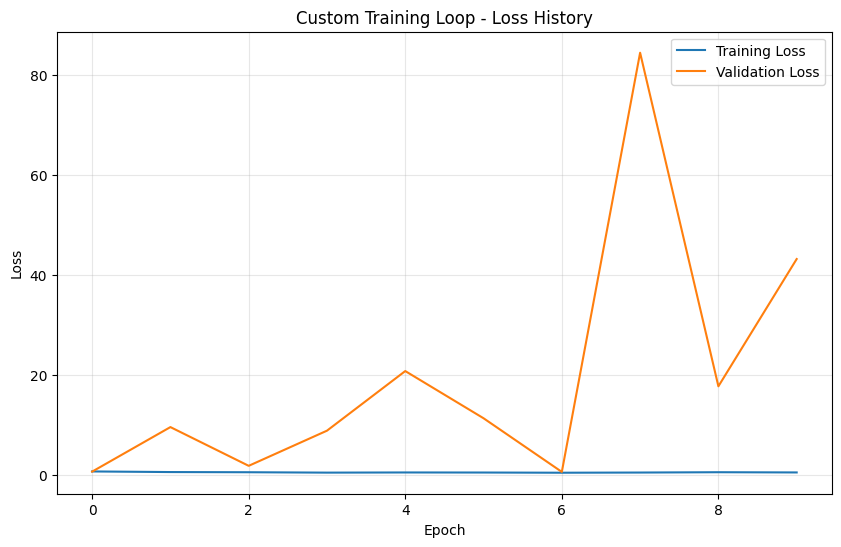

In [30]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history['train_loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Custom Training Loop - Loss History')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 8. TensorFlow Functions dan Graphs

`@tf.function` mengkonversi Python function ke TensorFlow graph untuk performa lebih baik.

### 8.1 tf.function Decorator

In [31]:
import time

# Tanpa tf.function
def slow_cube(x):
    return x * x * x

# Dengan tf.function
@tf.function
def fast_cube(x):
    return x * x * x

# Benchmark
x = tf.random.normal([10000, 10000])

# Warm up
_ = slow_cube(x)
_ = fast_cube(x)

# Time slow version
start = time.time()
for _ in range(10):
    _ = slow_cube(x)
slow_time = time.time() - start

# Time fast version
start = time.time()
for _ in range(10):
    _ = fast_cube(x)
fast_time = time.time() - start

print(f"Without @tf.function: {slow_time:.4f}s")
print(f"With @tf.function: {fast_time:.4f}s")
print(f"Speedup: {slow_time/fast_time:.2f}x")

Without @tf.function: 1.0372s
With @tf.function: 0.8819s
Speedup: 1.18x


### 8.2 AutoGraph: Control Flow

In [32]:
# AutoGraph handles Python control flow
@tf.function
def f(x):
    if tf.reduce_sum(x) > 0:
        return x * 2
    else:
        return x * -1

# Test
print(f"f([1, 2]) = {f(tf.constant([1., 2.])).numpy()}")
print(f"f([-3, 1]) = {f(tf.constant([-3., 1.])).numpy()}")

f([1, 2]) = [2. 4.]
f([-3, 1]) = [ 3. -1.]


In [33]:
# Loop dengan tf.function
@tf.function
def sum_squares(n):
    result = tf.constant(0)
    for i in tf.range(n):
        result = result + i * i
    return result

print(f"Sum of squares (0 to 9): {sum_squares(tf.constant(10)).numpy()}")

Sum of squares (0 to 9): 285


### 8.3 Best Practices untuk tf.function

In [34]:
# Best Practices

# 1. Gunakan TensorFlow operations, bukan Python/NumPy
@tf.function
def good_fn(x):
    return tf.reduce_sum(x)  # TensorFlow op

# 2. Avoid creating variables inside tf.function
# (variables should be created outside)

# 3. Use input_signature untuk fixed shapes
@tf.function(input_signature=[tf.TensorSpec(shape=[None], dtype=tf.float32)])
def typed_fn(x):
    return x * 2

# 4. Gunakan reduce_retracing=True untuk input yang bervariasi
@tf.function(reduce_retracing=True)
def flexible_fn(x):
    return tf.reduce_mean(x)

print("Best practices untuk tf.function diterapkan!")

Best practices untuk tf.function diterapkan!


## 9. Kesimpulan

### Key Takeaways:

1. **Tensors** adalah struktur data fundamental TensorFlow:
   - Immutable: `tf.constant`
   - Mutable: `tf.Variable` (untuk trainable weights)

2. **Custom Loss Functions**:
   - Bisa sebagai simple function atau subclass `keras.losses.Loss`
   - Implementasi `call()` method
   - Override `get_config()` untuk serialization

3. **Custom Metrics**:
   - Subclass `keras.metrics.Metric`
   - Implement `update_state()`, `result()`, `reset_state()`
   - Gunakan `add_weight()` untuk state variables

4. **Custom Layers**:
   - `Lambda` layer untuk operasi sederhana
   - Subclass `keras.layers.Layer`
   - Implement `build()` untuk weights, `call()` untuk forward pass

5. **Custom Models**:
   - Subclass `keras.Model`
   - Define layers di `__init__()`, forward pass di `call()`

6. **Custom Training Loops**:
   - `tf.GradientTape` untuk automatic differentiation
   - Full control atas training process
   - Useful untuk research dan custom algorithms

7. **tf.function** & Graphs:
   - Kompilasi ke graph untuk performa
   - AutoGraph handles control flow
   - Gunakan TensorFlow ops, bukan Python ops

### Kapan Menggunakan Custom Code:
- Custom loss/metric yang tidak tersedia
- Novel layer architectures
- Research experiments
- Full control atas training process
- Performance optimization